In [10]:
#  outfit combinations 
# ((X*Y)+V)*(W+1)*(Z+1)= N
#X=Number of Tops
#Y=Number of Bottoms
#Z= Number of Jackets
#W=Number of Shoes
#V = Number of Dresses
X = 5
Y = 5
Z = 2
W = 2
V = 3
N = ((X*Y)+V)*(W)*(Z+1)

In [12]:
#N*(A+C+1)*B=D
#N= Number of Outfit Combinations
#A= Number of Necklaces
#B= Number of Bracelets
#C= Number of Scarves
A = 5
C = 2
B = 4
D = N*(A+C+1)*B

In [20]:
import cv2 as cv
def get_holes(image, thresh):
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  im_bw = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)[1]
  im_bw_inv = cv.bitwise_not(im_bw)

  _, contour, _ = cv.findContours(im_bw_inv, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
  for cnt in contour:
     cv.drawContours(im_bw_inv, [cnt], 0, 255, -1)

  nt = cv.bitwise_not(im_bw)
  im_bw_inv = cv.bitwise_or(im_bw_inv, nt)
  return im_bw_inv 

def remove_background(image, thresh, scale_factor=.25, kernel_range=range(1, 15), border=None):
  border = border or kernel_range[-1]

  holes = get_holes(image, thresh)
  small = cv.resize(holes, None, fx=scale_factor, fy=scale_factor)
  bordered = cv.copyMakeBorder(small, border, border, border, border, cv.BORDER_CONSTANT)

  for i in kernel_range:
      kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*i+1, 2*i+1))
      bordered = cv.morphologyEx(bordered, cv.MORPH_CLOSE, kernel)

  unbordered = bordered[border: -border, border: -border]
  mask = cv.resize(unbordered, (image.shape[1], image.shape[0]))
  fg = cv.bitwise_and(image, image, mask=mask)
  return fg

img = cv.imread('/Users/mcassettix/Documents/python_scripts/githubs/cartoonizer/imgs/output/blueshit_cartoon.jpeg')
nb_img = remove_background(img, 230)

In [2]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

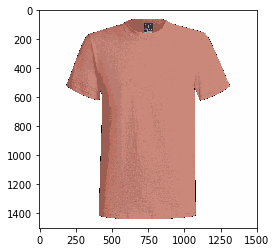

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()